In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

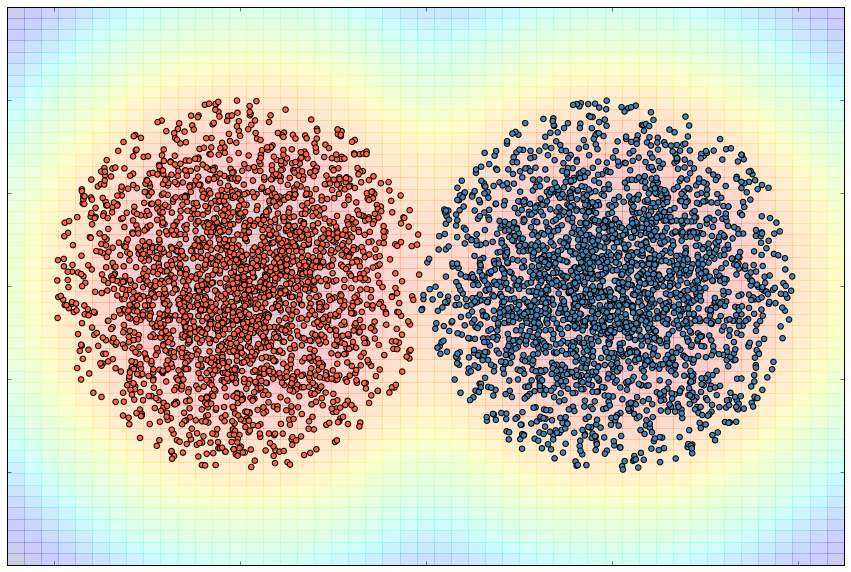

In [34]:
mu1 = [0, 0]
mu2 = [4, 0]

cov1 = [[1, 0], [0, 1]]
cov2 = [[1, 0], [0, 1]]

c1 = np.random.multivariate_normal(mu1, cov1, 3000)
c2 = np.random.multivariate_normal(mu2, cov2, 3000)

def filter_c1(x, y):
    if (x-mu1[0])**2 + (y-mu1[1])**2 < 4: return True
    else: return False

def filter_c2(x, y):
    if (x-mu2[0])**2 + (y-mu2[1])**2 < 4: return True
    else: return False
    
c1 = c1[np.vectorize(filter_c1)(c1[:,0], c1[:,1])]
c2 = c2[np.vectorize(filter_c2)(c2[:,0], c2[:,1])]

from sklearn.mixture import GMM

X = np.r_[c1,c2] 
gmm = GMM(n_components=2)
gmm.fit(X)
y_pred = gmm.predict(X)

def coloring(idx):
    if idx==0:
        return 'tomato'
    if idx==1:
        return 'steelblue'
    if idx==2:
        return 'limegreen'

colors = list(map(coloring, y_pred))

xx, yy = np.meshgrid(np.linspace(-2.5, 6.5), np.linspace(-3,3))
zz = np.vectorize(lambda x,y: gmm.score_samples([[x, y]])[0][0])(xx, yy)

plt.figure(figsize=(15,10))
plt.xlim([-2.5, 6.5])
plt.ylim([-3, 3])
plt.tick_params(labelbottom='off', labelleft='off')
plt.pcolor(xx, yy, zz, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=colors, s=30)
plt.savefig('Mixture1.png')

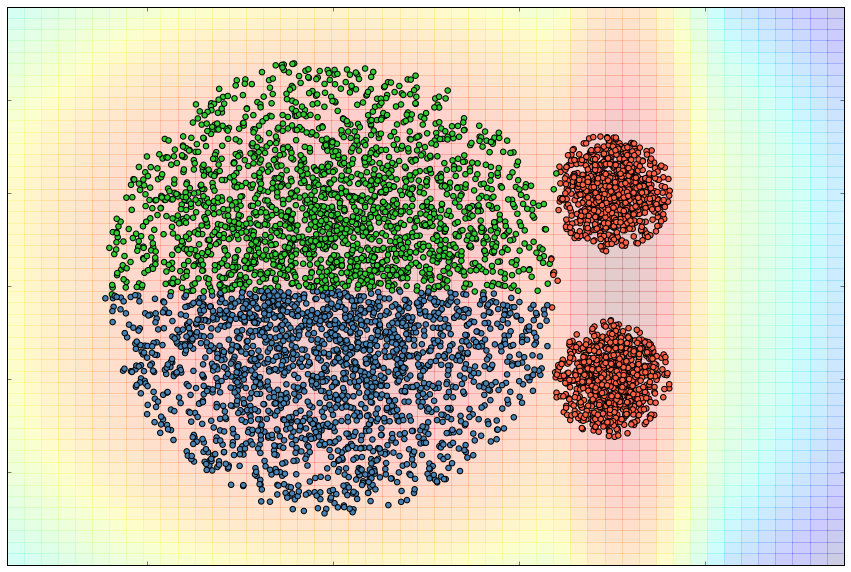

In [35]:
mu1 = [0, 0]
mu2 = [3, 1]
mu3 = [3, -1]

cov1 = [[2, 0], [0, 2]]
cov2 = [[0.1, 0], [0, 0.1]]
cov3 = [[0.1, 0], [0, 0.1]]

c1 = np.random.multivariate_normal(mu1, cov1,5000)
c2 = np.random.multivariate_normal(mu2, cov2, 1000)
c3 = np.random.multivariate_normal(mu3, cov3, 1000)

def filter_c1(x, y):
    if (x-mu1[0])**2 + (y-mu1[1])**2 < 6: return True
    else: return False

def filter_c2(x, y):
    if (x-mu2[0])**2 + (y-mu2[1])**2 < 0.4: return True
    else: return False
    
def filter_c3(x, y):
    if (x-mu3[0])**2 + (y-mu3[1])**2 < 0.4: return True
    else: return False
    
c1 = c1[np.vectorize(filter_c1)(c1[:,0], c1[:,1])]
c2 = c2[np.vectorize(filter_c2)(c2[:,0], c2[:,1])]
c3 = c3[np.vectorize(filter_c3)(c3[:,0], c3[:,1])]


from sklearn.mixture import GMM

X = np.r_[c1,c2,c3] 
gmm = GMM(n_components=3, n_iter=100000)
gmm.fit(X)
y_pred = gmm.predict(X)

def coloring(idx):
    if idx==0:
        return 'tomato'
    if idx==1:
        return 'steelblue'
    if idx==2:
        return 'limegreen'

colors = list(map(coloring, y_pred))

xx, yy = np.meshgrid(np.linspace(-3.5, 5.5), np.linspace(-3,3))
zz = np.vectorize(lambda x,y: gmm.score_samples([[x, y]])[0][0])(xx, yy)

plt.figure(figsize=(15,10))
plt.xlim([-3.5, 5.5])
plt.ylim([-3, 3])
plt.tick_params(labelbottom='off', labelleft='off')
plt.pcolor(xx, yy, zz, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=colors, s=30)
plt.savefig('Mixture3.png')

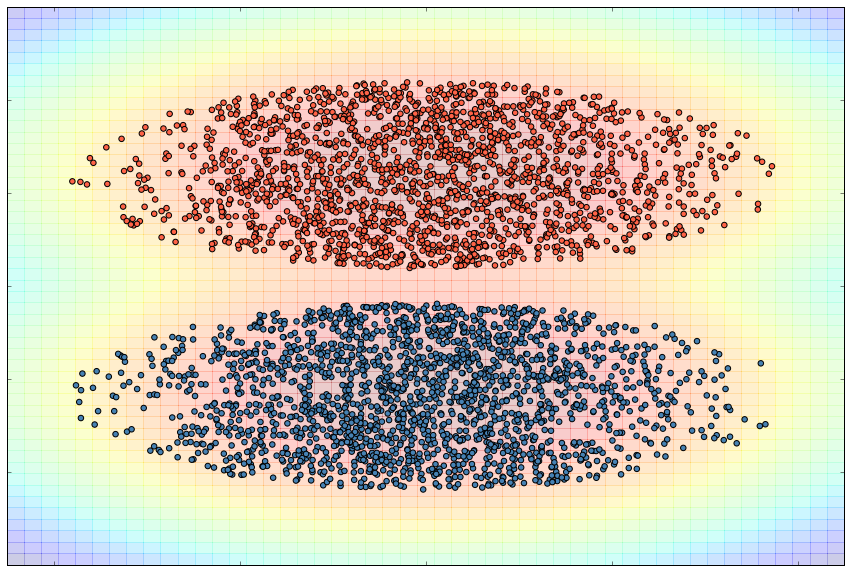

In [41]:
mu1 = [0, 1.19]
mu2 = [0, -1.19]

cov = [[3, 0], [0, 3]]

c1 = np.random.multivariate_normal(mu1, cov, 5000)
c2 = np.random.multivariate_normal(mu2, cov, 5000)

def filter_c1(x, y):
    if (x-mu1[0])**2/15 + (y-mu1[1])**2 < 1: return True
    else: return False

def filter_c2(x, y):
    if (x-mu2[0])**2/15 + (y-mu2[1])**2 < 1: return True
    else: return False
    
c1 = c1[np.vectorize(filter_c1)(c1[:,0], c1[:,1])]
c2 = c2[np.vectorize(filter_c2)(c2[:,0], c2[:,1])]

from sklearn.mixture import GMM

X = np.r_[c1,c2] 
gmm = GMM(n_components=2, n_iter=100000)
gmm.fit(X)
y_pred = gmm.predict(X)

def coloring(idx):
    if idx==0:
        return 'tomato'
    if idx==1:
        return 'steelblue'
    if idx==2:
        return 'limegreen'

colors = list(map(coloring, y_pred))

xx, yy = np.meshgrid(np.linspace(-4.5,4.5), np.linspace(-3,3))
zz = np.vectorize(lambda x,y: gmm.score_samples([[x, y]])[0][0])(xx, yy)

plt.figure(figsize=(15,10))
plt.xlim([-4.5, 4.5])
plt.ylim([-3, 3])
plt.tick_params(labelbottom='off', labelleft='off')
plt.pcolor(xx, yy, zz, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=colors, s=30)
plt.savefig('Mixture2.png')